In [1]:
## This code tries to analyze the broken regions of the transmembrane protein and see the environment of proteins surrounding them 

In [1]:
import pandas as pd 
import numpy as np 
import json
import csv

In [2]:
broken_membrane_report = f = open('../outputs/brokenHelix/concise_report.json')
broken_membrane_report= json.load(broken_membrane_report)
del broken_membrane_report[-1] ## run this only once 

In [21]:
res_count_dict = {};
broken_res_dict={};
total_helix_count =0 ; 
broken_helix_count = 0 ; 
for ind_report in broken_membrane_report:
    helix_list = ind_report['helices'];
    for ind_helix in helix_list: 
        total_helix_count = total_helix_count + 1; 
        main_chain_res = ind_helix['mainChainHelix_residues'];
        prev_res_no = -1 ; 
        for ind_res in main_chain_res:
            res_no = int(ind_res[22:26])
            res_name = ind_res[17:20]
            if(res_no != prev_res_no):
                if(res_name not in res_count_dict.keys()):
                    res_count_dict[res_name]= 1;
                else:
                    res_count_dict[res_name]= res_count_dict[res_name] + 1; 
                   # print(res_no)
                prev_res_no= res_no;

        starting_res = int(ind_helix['starting_residue']);
        ending_res = int(ind_helix['ending_residue']);
        broken_regions = ind_helix['broken_regions']; 
        if(len(broken_regions)):
            broken_helix_count = broken_helix_count + 1; 
            broken_flag = 1; 
            ind =0;
            for ind_res in main_chain_res:
                res_no = int(ind_res[22:26]);
                if(ind == len(broken_regions) ):
                    break;
                if(res_no==broken_regions[ind]):
                    ind = ind + 1; 
                    res_name = ind_res[17:20];
                    if(res_name not in broken_res_dict.keys()):
                        broken_res_dict[res_name]= 0;
                    else:
                        broken_res_dict[res_name]= broken_res_dict[res_name] + 1; 

                    end_res = res_no + 4; 

                    for ind_res1 in main_chain_res:
                        res_no1 = int(ind_res1[22:26]);
                        if(end_res  == res_no1):
                            res_name1 = ind_res1[17:20];
                            if(res_name1 not in broken_res_dict.keys()):
                                broken_res_dict[res_name1]= 0;
                            else:
                                broken_res_dict[res_name1]= broken_res_dict[res_name1] + 1;
                            break;
            
            


In [22]:
percent_broken_dict ={};
for res_name in broken_res_dict.keys():
    percent_broken_dict[res_name] = broken_res_dict[res_name]*100/res_count_dict[res_name];
print('Percent of helices broken ', (broken_helix_count/total_helix_count) * 100 );

Percent of helices broken  57.15570149720496


In [35]:
res_count_dict = dict(sorted(res_count_dict.items(), key=lambda kv: kv[1]))
percent_broken_dict = dict(sorted(percent_broken_dict.items(), key=lambda kv: kv[1]))
broken_res_dict = dict(sorted(broken_res_dict.items(), key=lambda kv: kv[1]))


<BarContainer object of 20 artists>

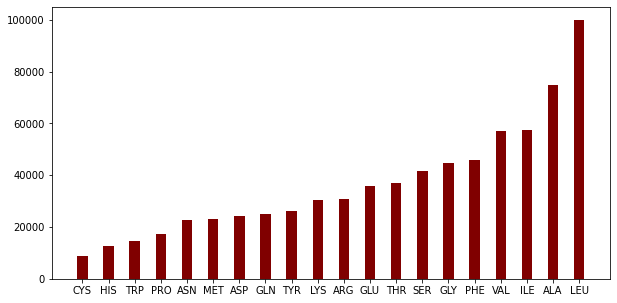

In [38]:
import matplotlib.pyplot as plt
amino_acid_labels = res_count_dict.keys();
percent_in_database = res_count_dict.values();
fig = plt.figure(figsize = (10, 5))
plt.bar(amino_acid_labels, percent_in_database, color ='maroon',
        width = 0.4)

<BarContainer object of 20 artists>

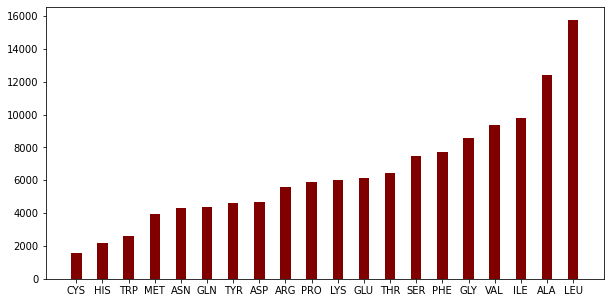

In [36]:
import matplotlib.pyplot as plt
amino_acid_labels = broken_res_dict.keys();
percent_in_database = broken_res_dict.values();
fig = plt.figure(figsize = (10, 5))
plt.bar(amino_acid_labels, percent_in_database, color ='maroon',
        width = 0.4)

<BarContainer object of 20 artists>

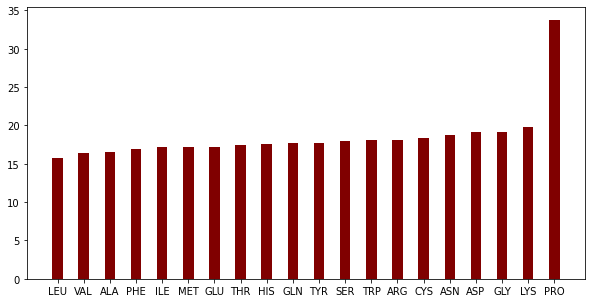

In [31]:
import matplotlib.pyplot as plt
amino_acid_labels = percent_broken_dict.keys();
percent_in_kink = percent_broken_dict.values();
fig = plt.figure(figsize = (10, 5))
plt.bar(amino_acid_labels, percent_in_kink, color ='maroon',
        width = 0.4)